### 📚 머신러닝 1장
#### 🐟 생선 분류 문제

🔹첫 번째 머신 러닝 프로그램

- 생선의 길이와 무게로 비교

도미 데이터 준비

In [26]:
bream_length = [25.4,	26.3,	26.5,	29.0,	29.0,	29.7,	29.7,	30.0,	30.0,	30.7,	31.0,	
31.0,	31.5,	32.0,	32.0,	32.0,	33.0,	33.0,	33.5,	33.5,	34.0,	34.0,	
34.5,	35.0,	35.0,	35.0,	35.0,	36.0,	36.0,	37.0,	38.5,	38.5,	39.5,	
41.0,	41.0]

bream_weight = [242.0,	290.0,	340.0,	363.0,	430.0,	450.0,	500.0,	390.0,	450.0,	500.0,	
475.0,	500.0,	500.0,	340.0,	600.0,	600.0,	700.0,	700.0,	610.0,	650.0,
575.0,	685.0,	620.0,	680.0,	700.0,	725.0,	720.0,	714.0,	850.0,	1000.0,
920.0,	955.0,	925.0,	975.0,	950.0]

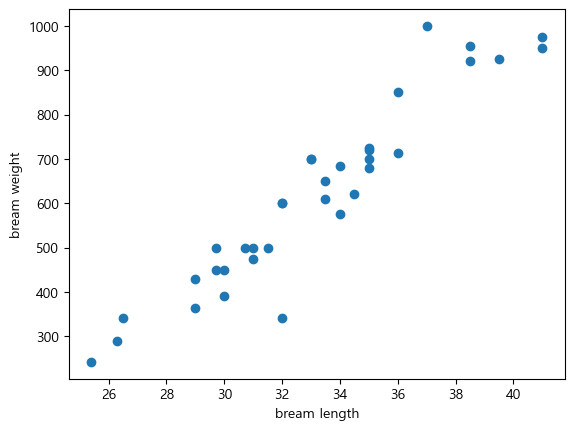

In [27]:
# 산점도 그래프
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('bream length')
plt.ylabel('bream weight')
plt.show()

📌 일직선에 가까운 선형(linear) 그래프

빙어 데이터와 도미 데이터 비교

In [28]:
# 빙어(smelt) 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 
12.4, 13.0, 14.3, 15.0]

smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 
12.2, 19.7, 19.9]

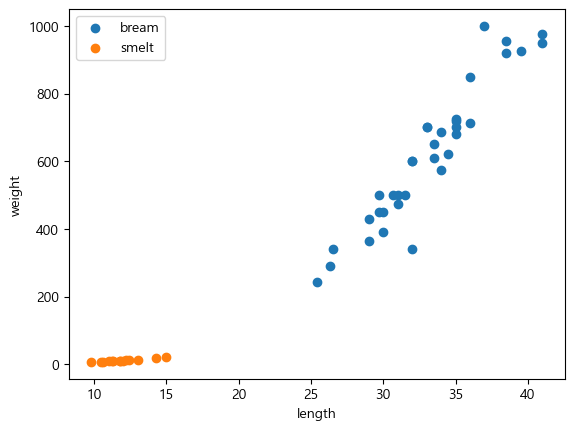

In [29]:
# 빙어 데이터와 도미 데이터 비교 (산점도)
plt.scatter(bream_length, bream_weight, label = 'bream')
plt.scatter(smelt_length, smelt_weight, label = 'smelt')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

📌 빙어의 크기와 무게가 도미와 많은 차이를 보임

2차원 리스트로 데이터 변형
- 1차원 리스트 2개를 2차원 리스트로 변경
- zip(length, weight) 함수 이용

In [30]:
# 도미 데이터와 빙어 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [31]:
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


정답 데이터 준비
- 생선의 길이와 무게를 이용하여 도미(1)와 빙어(0)을 구분
    * 찾고자 하는 데이터(도미)를 1로 설정
- 원본데이터
    * 도미 데이터 : 35마리의 데이터를 1로 설정
    * 빙어 데이터 : 14마리의 데이터를 0으로 설정

In [32]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


✔️ K-최근접 알고리즘 (K-Nearest Neighbor, KNN)
- 비슷한 특성을 가진 데이터는 비슷한 범주에 속한다
- 주변의 가장 가까운 k개의 데이터를 보고, 데이터가 속할 그룹 판단

K-최근접 알고리즘 적용 과정

In [33]:
# KNN 모델 생성
# KNeighborClassifier(n_neighbors, ...) 객체 생성
# 기본 이웃의 개수 : n_neighbors = 5
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [34]:
# 모델 훈련(학습)
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [35]:
# 모델 평가 : score() 함수
# 정확도의 평균값 리턴
print("score: ", kn.score(fish_data, fish_target))

score:  1.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
# 새로운 데이터를 활용한 결과 예측
# x : 2차원 리스트 형태
print('predict: ', kn.predict([[30, 600]]))

# class label return (0, 1)

predict:  [1]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [37]:
import platform
if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')

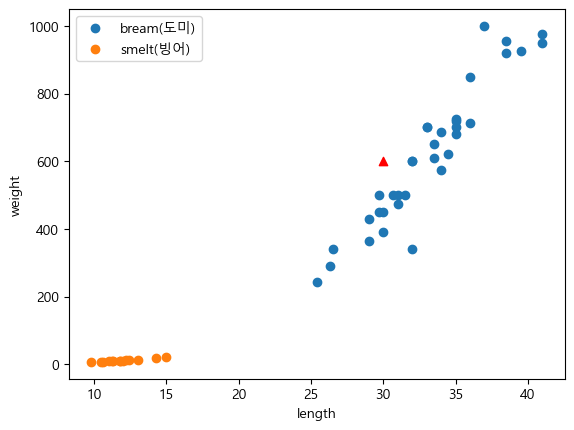

In [38]:
plt.scatter(bream_length, bream_weight, label = 'bream(도미)')
plt.scatter(smelt_length, smelt_weight, label = 'smelt(빙어)')
plt.scatter(30, 600, marker = '^', color = 'red')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

K-최근접 알고리즘 속성

In [39]:
# _fit_X 속성 => fish_data
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [40]:
# _y 속성 => fish_target
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
# n_neighbors 값 변경
kn49 = KNeighborsClassifier(n_neighbors=49)

In [42]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7142857142857143

📌 fish_data의 49개 중에 도미가 35개를 차지

In [25]:
# 35 / 49의 결과와 동일
print(35 / 49)

0.7142857142857143
